# Workbench for the new LIME explainer

## Set up the paths

In [26]:
import os
import pathlib
import random
import sys

Add the local `inspection` Python package to the `PYTHONPATH` so that we can import it:

In [27]:
os.getcwd()

'C:\\Users\\Matze\\Documents\\University\\Work\\QC\\xai-demonstrator\\visual-inspection\\explainers'

In [28]:
INSPECTION_PATH = pathlib.Path(os.getcwd()).parent / "inspection-backend" 

In [29]:
sys.path.append(str(INSPECTION_PATH.absolute()))

## Load the necessary parts from `inspection`

In [30]:
from inspection.model.model import model
from inspection.model.predict import predict_class, preprocess

Test the model with a random image

In [31]:
import numpy as np

rng = np.random.default_rng()
random.seed(1)

In [32]:
img = rng.random((1, 224, 224, 3))


In [33]:
prediction = model.predict(img)


## Load the new LIME

In [34]:
from inspection.explainer.explainers.new_lime_ import create_segments, generate_samples, generate_images, predict_images, weigh_segments
from PIL import Image
from skimage import img_as_float
import matplotlib.pyplot as plt

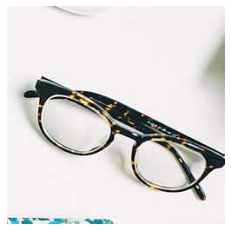

(1, 224, 224, 3)

In [35]:
img = Image.open("C:\\Users\\Matze\\Documents\\University\\Work\\BeispielBilder\\glasses.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()
#img = np.squeeze(img)
img = preprocess(img)
img.shape

In [36]:
predict_class(img)

'eine Brille'

In [37]:
np.argmax(model.predict(img))
img = np.squeeze(img)

In [49]:
segment_mask = create_segments(img, "slic", {})

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163], dtype=int64)

In [39]:
samples = generate_samples(segment_mask, 100, 0.5)

In [40]:
images = generate_images(img, segment_mask, samples)

In [41]:
predictions = predict_images(images, model)

In [42]:
predictions.shape

(101, 1001)

In [43]:
np.argmax(predictions[0])


917

In [44]:
predictions

array([[1.5100843e-04, 1.6812504e-03, 9.4027870e-05, ..., 1.3712788e-04,
        2.2977601e-04, 7.5705531e-03],
       [1.4911794e-06, 4.2562592e-06, 6.8968961e-07, ..., 1.7709442e-06,
        2.3879835e-05, 6.6338820e-05],
       [2.3174235e-04, 1.6503211e-04, 4.9758990e-05, ..., 1.0641929e-04,
        3.5674960e-04, 3.7274125e-03],
       ...,
       [1.7029041e-04, 2.8691243e-04, 1.4768155e-04, ..., 1.3417289e-04,
        2.3601978e-04, 1.3780257e-03],
       [8.3574378e-05, 1.9927371e-04, 2.2537372e-04, ..., 9.8899422e-05,
        8.7427767e-03, 1.3266916e-02],
       [8.2921922e-08, 8.4353474e-08, 8.2976818e-08, ..., 1.7932892e-07,
        5.5504341e-07, 5.9437730e-07]], dtype=float32)

In [45]:
np.argmax(predictions, axis=1)

array([917, 836, 611, 652, 836, 836, 836, 764, 145, 836, 836, 673, 836,
       917, 836, 836, 836, 836, 836, 836, 836, 836, 652, 611, 611, 836,
       921, 836, 836, 836, 836, 673, 836, 836, 611, 836,  92, 836, 836,
       836, 836, 836, 921, 667, 836, 836, 836, 836, 895, 836, 836, 836,
       836,  18, 836, 917, 836, 836, 611, 836, 836, 611, 836, 836,  99,
       836, 611, 836, 895, 836, 749, 836, 836, 836, 836, 673, 673, 836,
       611, 836, 584, 611, 584, 836, 836, 836, 836, 584, 673, 836, 921,
       836, 836, 917, 836, 836, 836, 611, 921, 836, 836], dtype=int64)

In [46]:
from  sklearn.linear_model import BayesianRidge

In [47]:
"""model = BayesianRidge()
f = model.fit(samples, predictions[:, 3])
model.coef_"""
samples[-1]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [48]:
coef = weigh_segments(samples, predictions)
coef
coef.size

164